In [52]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("C:/Users/Dominik Hahn/OneDrive/Studium/Master/Semester 1/Text Mining/Projekt/when2heat.xlsx", sheet_name="when2heat.xlsx", header=[0,1,2])
df.columns = df.columns.map(' '.join)
df.head()

,country variable attribute,country variable attribute.1,AT COP ASHP_floor,AT COP ASHP_radiator,AT COP ASHP_water,AT COP GSHP_floor,AT COP GSHP_radiator,AT COP GSHP_water,AT COP WSHP_floor,AT COP WSHP_radiator,...,SK heat_demand water,SK heat_demand water_COM,SK heat_demand water_MFH,SK heat_demand water_SFH,SK heat_profile space_COM,SK heat_profile space_MFH,SK heat_profile space_SFH,SK heat_profile water_COM,SK heat_profile water_MFH,SK heat_profile water_SFH
0,unit,NaN,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,...,MW,MW,MW,MW,MW/TWh,MW/TWh,MW/TWh,MW/TWh,MW/TWh,MW/TWh
1,2007-12-31T22:00:00Z,2007-12-31T23:00:00,2.89,2.36,2.12,4.22,3.02,2.5,4.55,3.29,...,215,90,88,38,235,173,196,66,69,13
2,2007-12-31T23:00:00Z,2008-01-01T00:00:00,2.89,2.36,2.12,4.22,3.02,2.5,4.55,3.29,...,215,90,88,38,235,173,196,66,69,13
3,2008-01-01T00:00:00Z,2008-01-01T01:00:00,2.89,2.36,2.12,4.22,3.03,2.5,4.56,3.29,...,249,113,91,45,239,177,197,83,71,15
4,2008-01-01T01:00:00Z,2008-01-01T02:00:00,2.89,2.36,2.12,4.23,3.03,2.5,4.56,3.29,...,243,117,88,37,243,180,204,87,69,12


In [5]:
# remove line with units
df_without_first = df.tail(-1)

In [64]:
# select all Variables for Germany (example structure)
germany = df_without_first.filter(regex="country|Unnamed|DE")
# using the start date as the value for the index and converting it to a timestamp value
germany['country variable attribute'] = pd.to_datetime(germany['country variable attribute'])
germany = germany.drop(['country variable attribute.1'], axis=1)
germany.head()

C:\Users\Dominik Hahn\AppData\Local\Temp\ipykernel_19812\2800957432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany['country variable attribute'] = pd.to_datetime(germany['country variable attribute'])


,country variable attribute,DE COP ASHP_floor,DE COP ASHP_radiator,DE COP ASHP_water,DE COP GSHP_floor,DE COP GSHP_radiator,DE COP GSHP_water,DE COP WSHP_floor,DE COP WSHP_radiator,DE COP WSHP_water,...,DE heat_demand water,DE heat_demand water_COM,DE heat_demand water_MFH,DE heat_demand water_SFH,DE heat_profile space_COM,DE heat_profile space_MFH,DE heat_profile space_SFH,DE heat_profile water_COM,DE heat_profile water_MFH,DE heat_profile water_SFH
1,2007-12-31 22:00:00+00:00,3.14,2.64,2.23,4.55,3.45,2.58,4.75,3.62,2.7,...,4152,1641,1759,752,219,151,171,66,68,12
2,2007-12-31 23:00:00+00:00,3.14,2.64,2.23,4.55,3.45,2.58,4.75,3.62,2.7,...,4152,1641,1759,752,219,151,171,66,68,12
3,2008-01-01 00:00:00+00:00,3.14,2.64,2.23,4.56,3.46,2.58,4.75,3.62,2.7,...,4791,2065,1823,903,225,157,174,83,71,15
4,2008-01-01 01:00:00+00:00,3.14,2.64,2.23,4.56,3.46,2.58,4.75,3.62,2.7,...,4649,2147,1766,736,230,161,179,86,68,12
5,2008-01-01 02:00:00+00:00,3.15,2.64,2.23,4.56,3.46,2.58,4.75,3.62,2.7,...,5244,2195,1695,1354,246,175,189,88,66,22


In [81]:
# Method for plotting all the columns of the datframe respective to the time series
def dataframe_plot(dataframe):
    plt.figure(figsize=(15,8))
    for i in range(1, len(dataframe.columns)):
        plt.plot(dataframe[dataframe.columns[0]], dataframe[dataframe.columns[i]], label=dataframe.columns[i])
    plt.legend()
    plt.show()

# General Overview for the three variables (for example for Germany)

## Heat Demand - All Variables

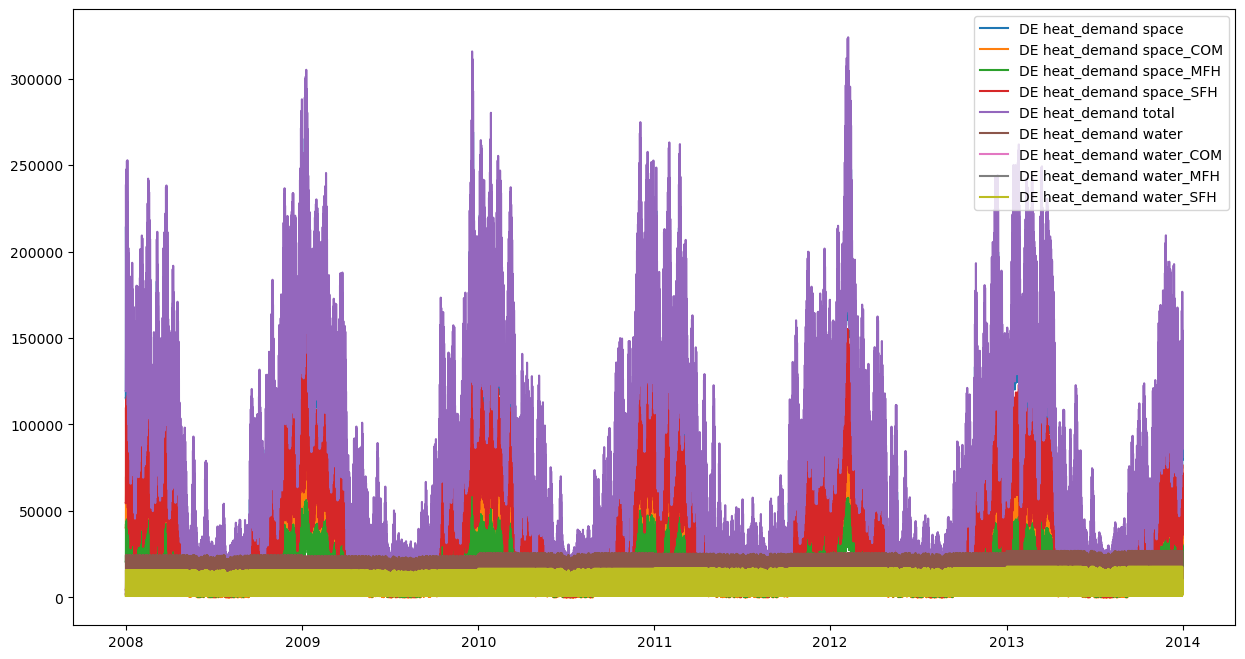

In [82]:
de_heat_demand = germany.filter(regex="country|heat_demand")
dataframe_plot(de_heat_demand)

## Heat Demand - Water Heating

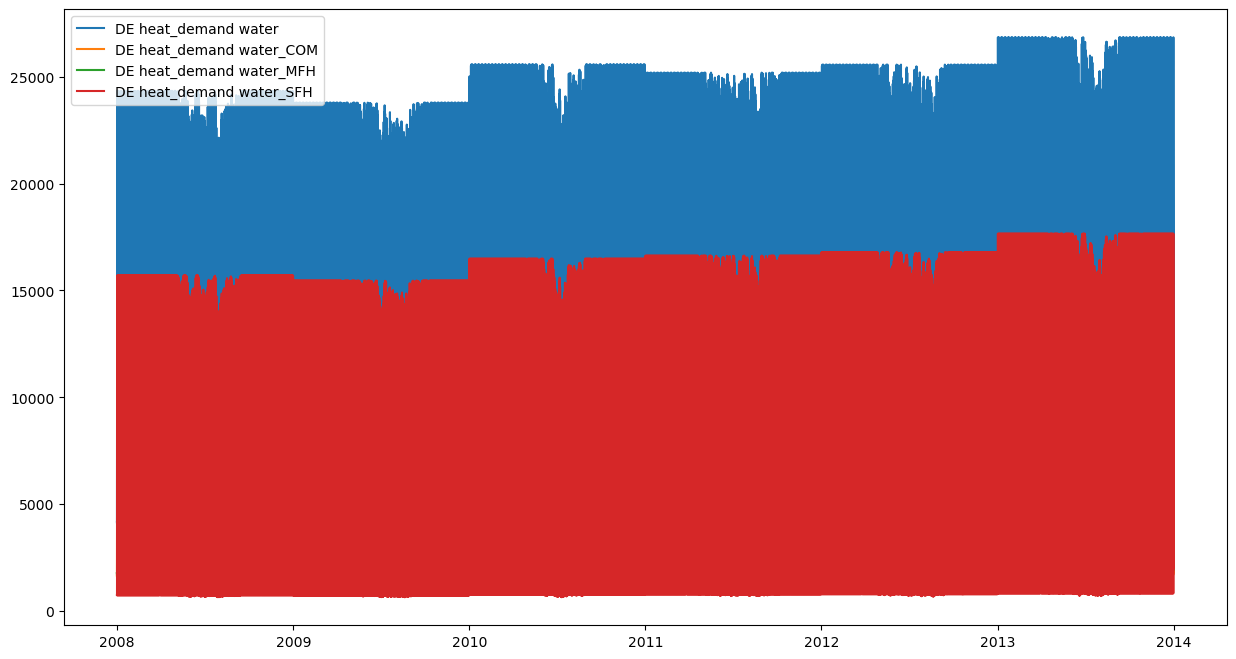

In [83]:
de_heat_demand_water = de_heat_demand.filter(regex="country|water")
dataframe_plot(de_heat_demand_water)

## Heat Demand - Space Heating

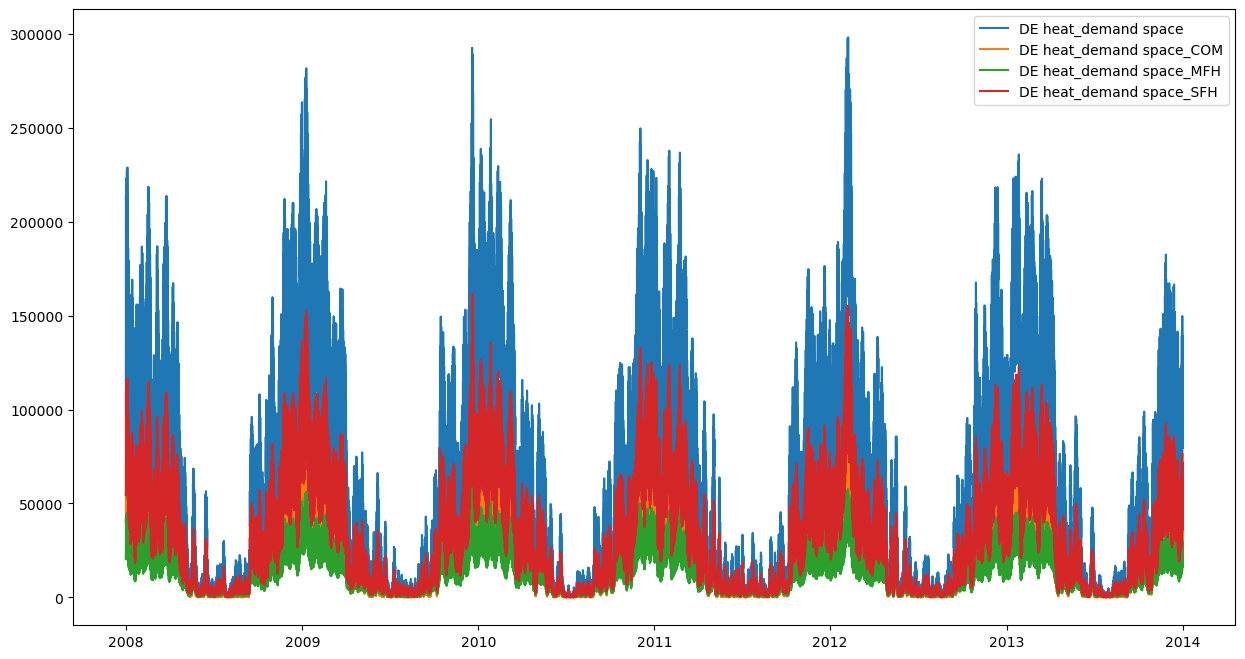

In [84]:
de_heat_demand_space = de_heat_demand.filter(regex="country|space")
dataframe_plot(de_heat_demand_space)

## Heat Profile

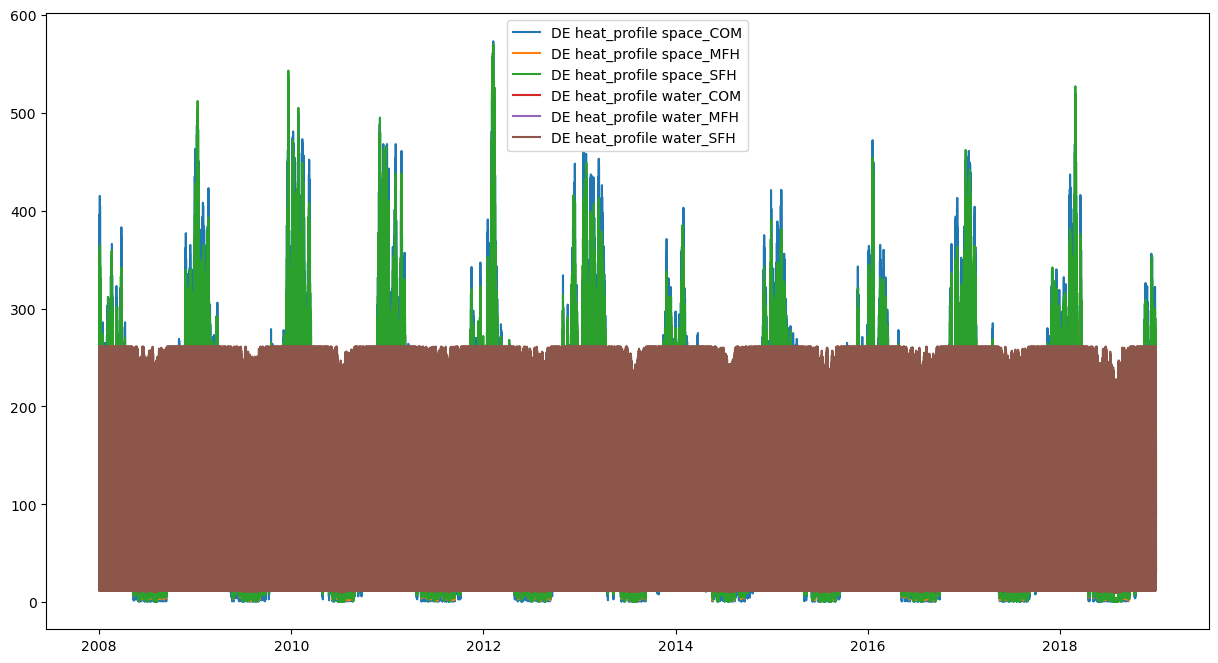

In [85]:
de_heat_profile = germany.filter(regex="country|heat_profile")
dataframe_plot(de_heat_profile)

## Heat Profile - Water Heating

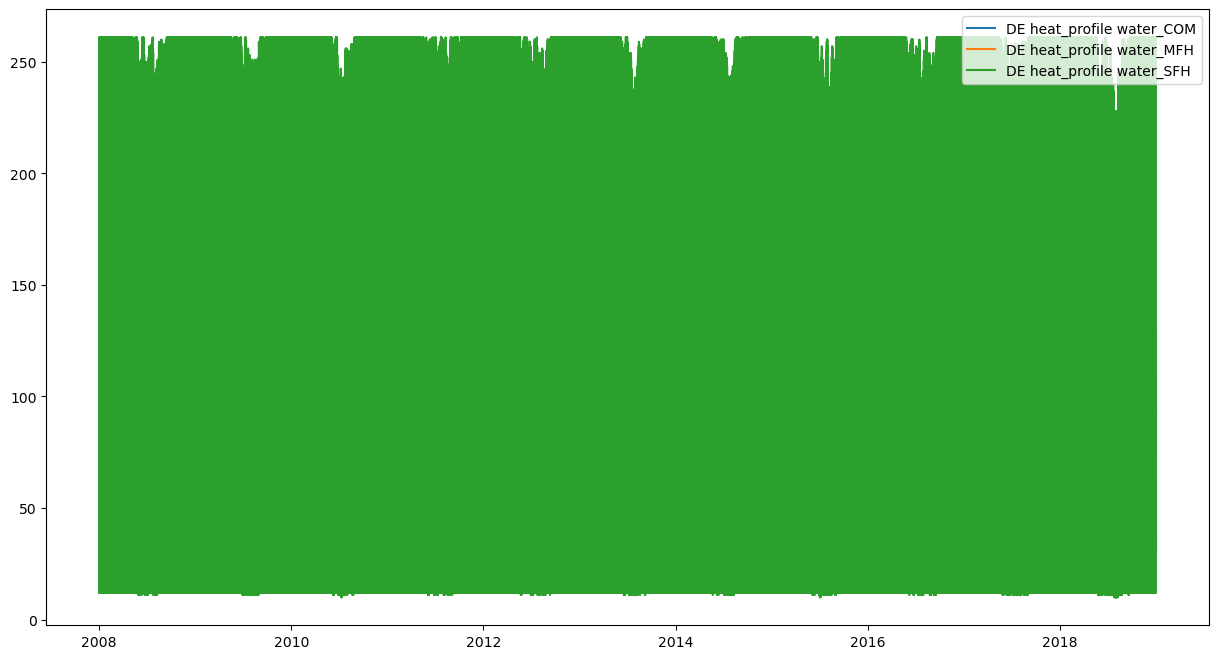

In [86]:
de_heat_profile_water = de_heat_profile.filter(regex="country|water")
dataframe_plot(de_heat_profile_water)

## Heat Profile - Space Heating

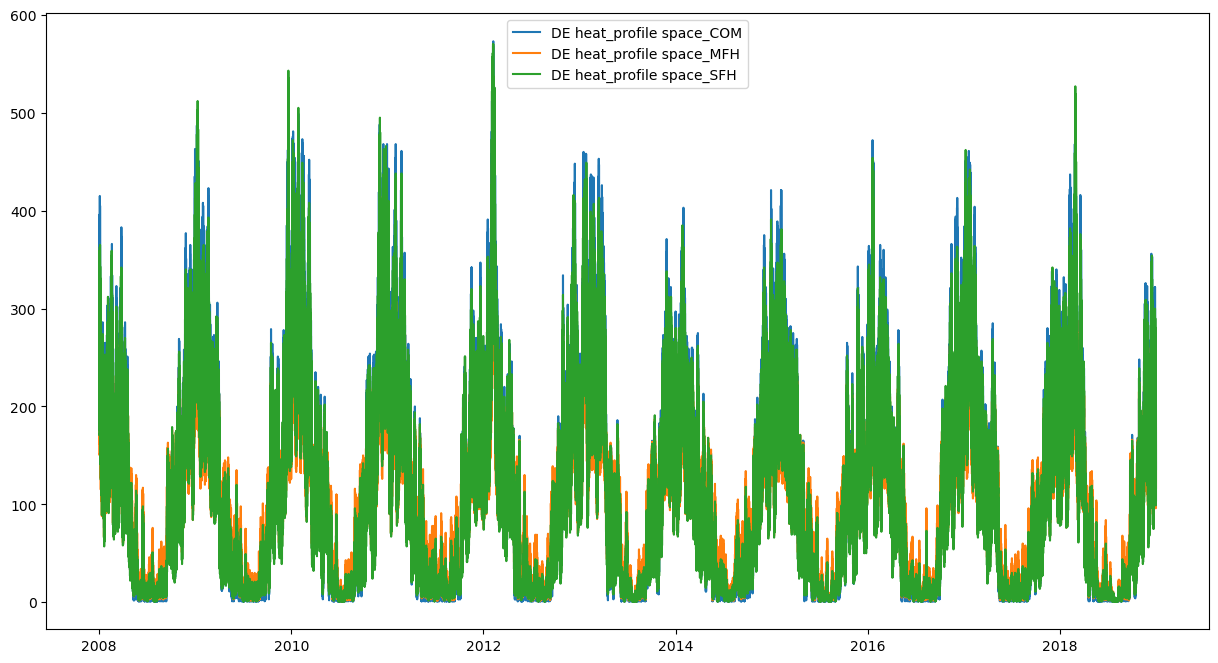

In [87]:
de_heat_profile_space = de_heat_profile.filter(regex="country|space")
dataframe_plot(de_heat_profile_space)

## Coefficient of Performance

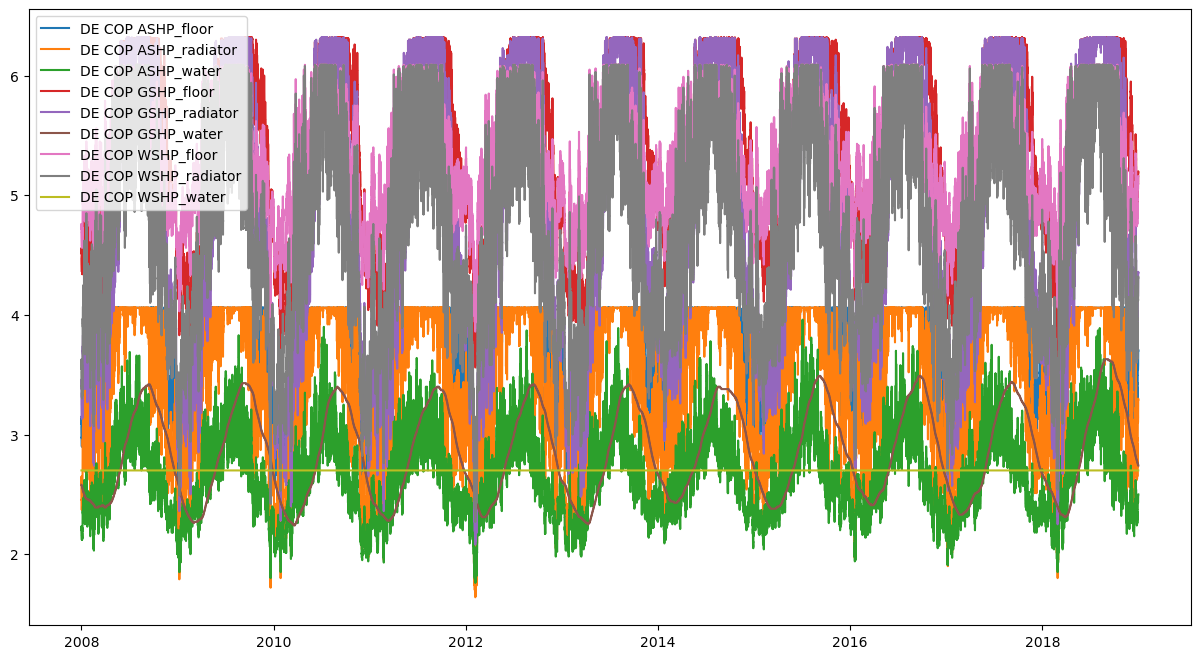

In [88]:
de_cop = germany.filter(regex="country|COP")
dataframe_plot(de_cop)

## Coefficient of Performance - Air Sourced Heat Pumps

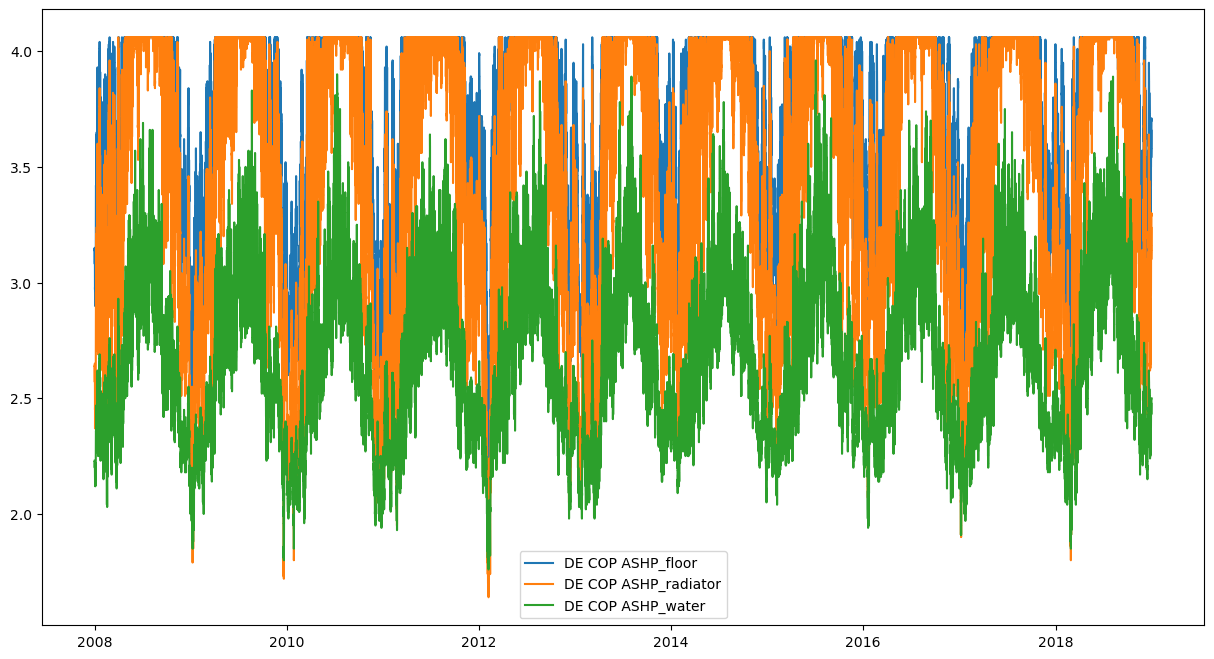

In [89]:
de_cop_ashp = de_cop.filter(regex="country|ASHP")
dataframe_plot(de_cop_ashp)

## Coefficient of Performance - Ground Sourced Heat Pumps

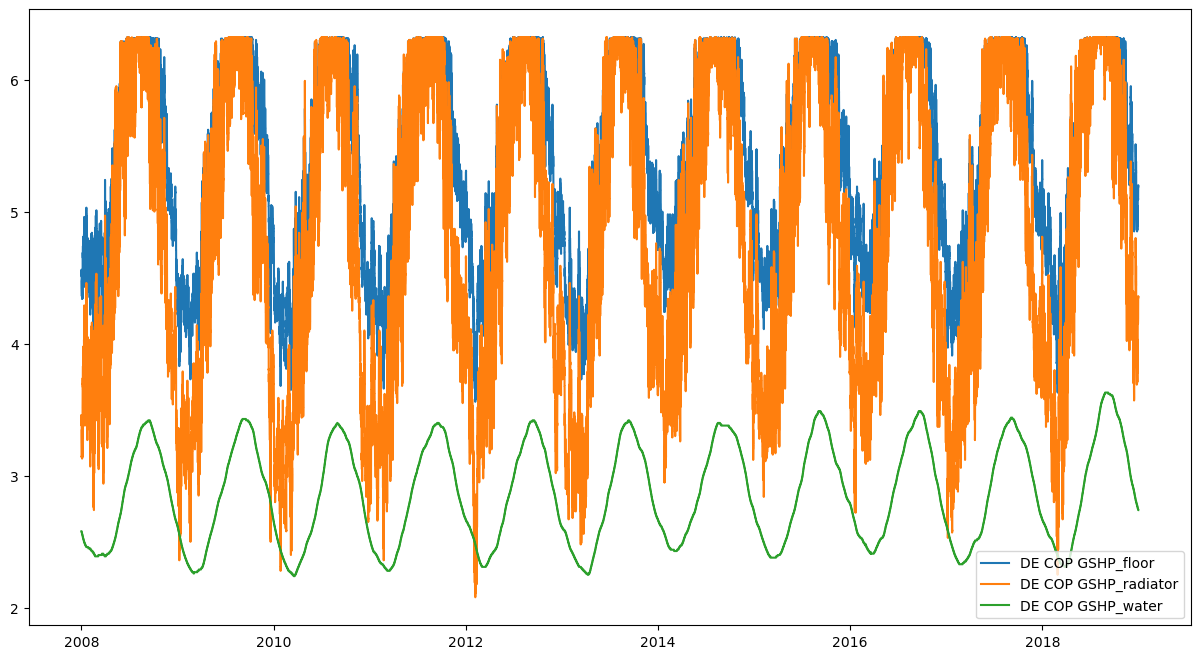

In [90]:
de_cop_gshp = de_cop.filter(regex="country|GSHP")
dataframe_plot(de_cop_gshp)

## Coefficient of Performance - Groundwater Sourced Heat Pumps

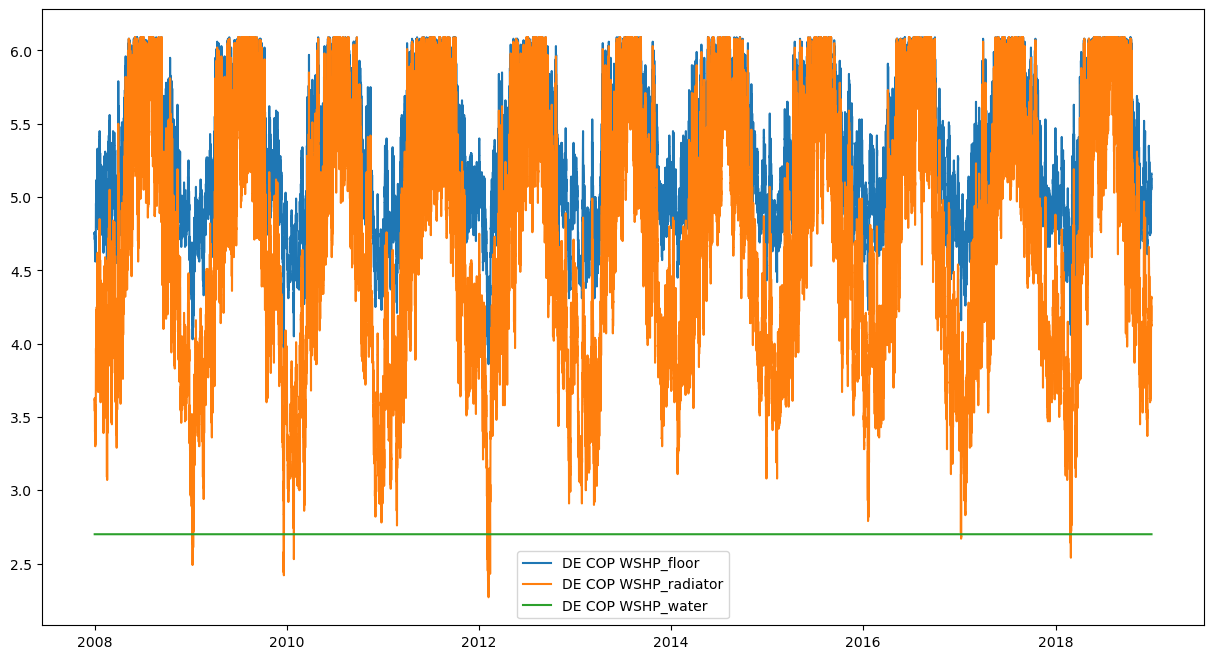

In [91]:
de_cop_wshp = de_cop.filter(regex="country|WSHP")
dataframe_plot(de_cop_wshp)

# General Overview for the different Household types (DE)

## Commercial Buildings

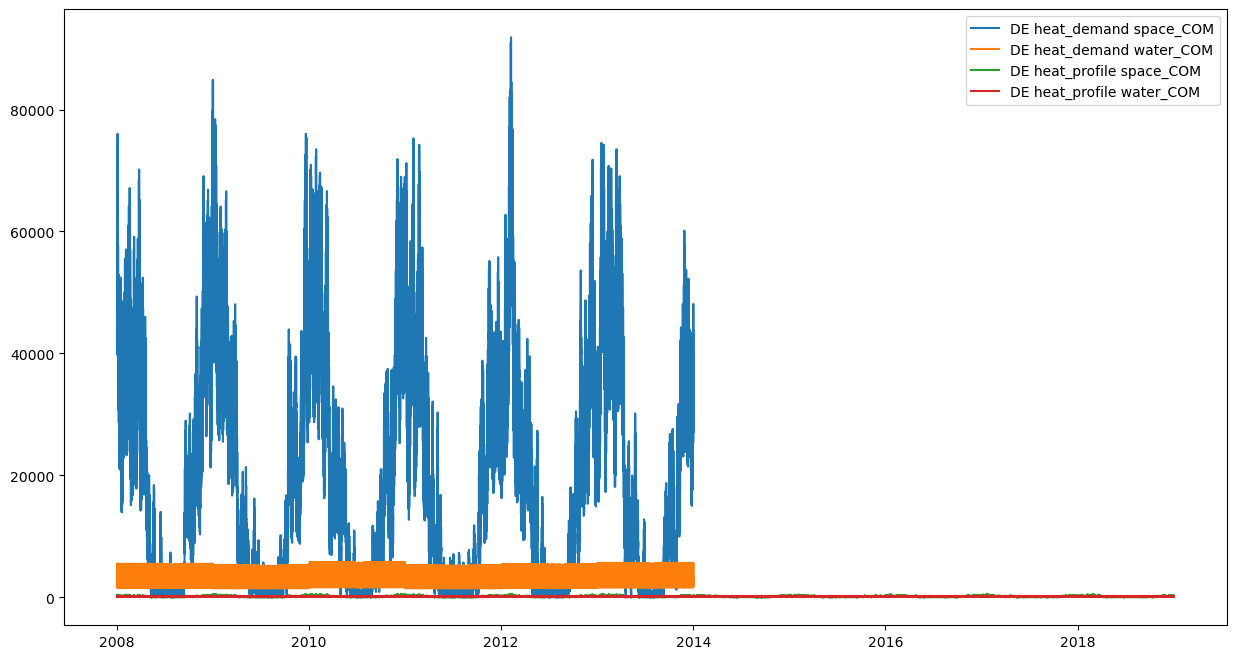

In [92]:
commercial_buildings = germany.filter(regex="country|COM")
dataframe_plot(commercial_buildings)

## Single-Family Households

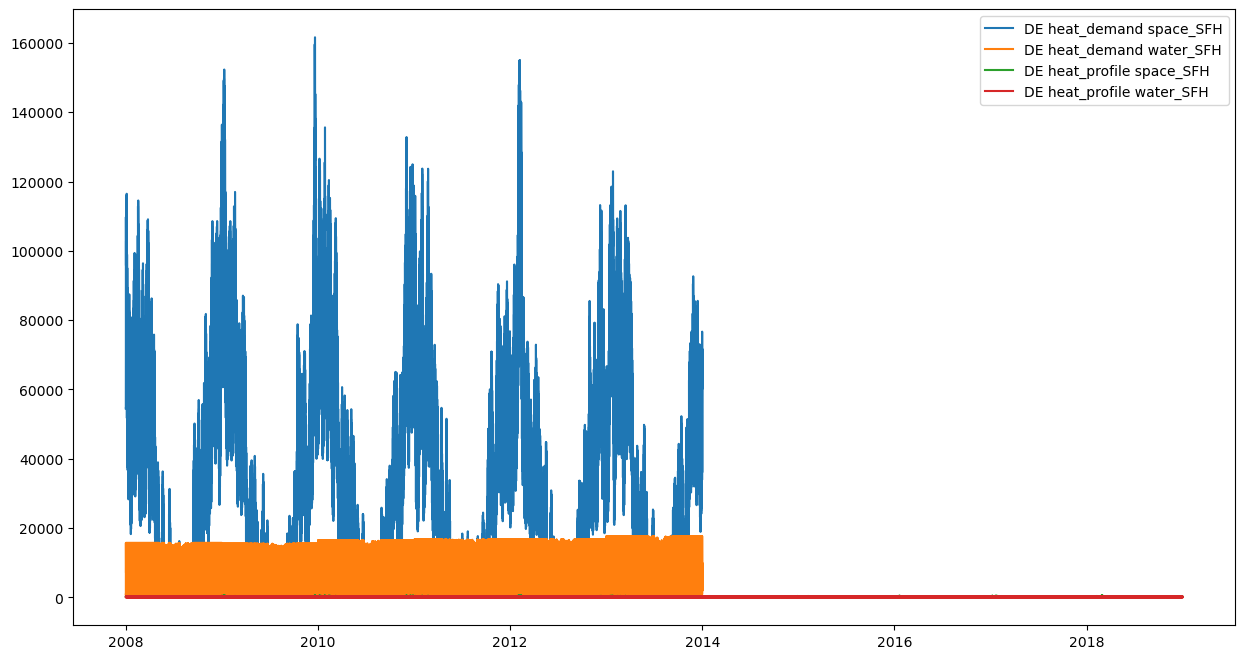

In [93]:
single_family_households = germany.filter(regex="country|SFH")
dataframe_plot(single_family_households)

## Multi-Family Households

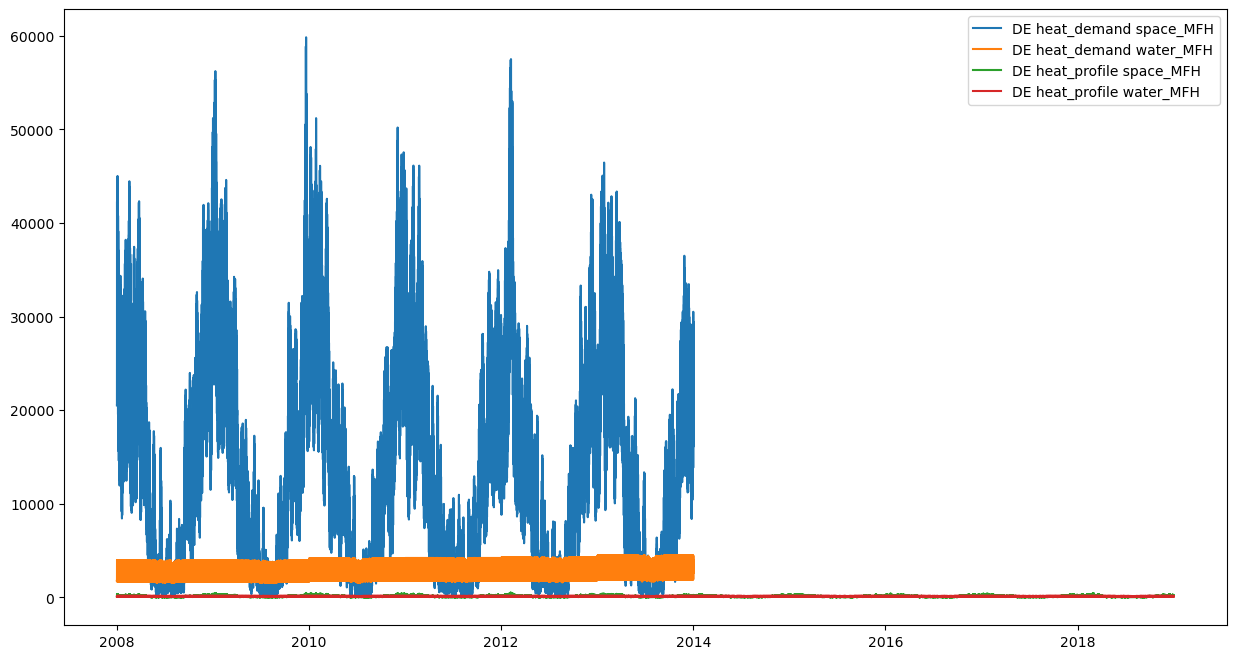

In [94]:
multi_family_households = germany.filter(regex="country|MFH")
dataframe_plot(multi_family_households)